![Ravedata logo ><](https://ravedata.in/wp-content/uploads/2020/08/RaveData_Full.jpg)

# Case Study - Analysis of Census 2011 data of India

Mohan works as a consultant for a policy thinktank body of the Indian Government. He is studying various key performance indicators of the different states within India to arrive at a better understanding of socio-economic conditions across the country. He decided to analyze the 2011 India census data.Original census data is released (and owned by) the Registrar General and Census Commissioner of India under the Ministry of Home Affairs, Government of India. The data Mohan is using is listed below.
- https://github.com/vedantnarayan/DataScienceTutorial/blob/master/Census_2011_Analysis/india-districts-census-2011.csv

Data source: http://censusindia.gov.in/2011-Common/CensusData2011.html

Mohan is particularly interested to get answers to the following questions.

1. How is literacy rate distributed across Indian States?
2. How is sex ratio distributed across Indian States?
3. How is Agricultural worker population distributed across Indian States?
4. How does the Mobile phone penetartion is distributed across Indian States?
5. Is there any relation between literacy rate and sex ratio?
6. Is there any relation between literacy rate and agricultural worker population?


Let's help Mohan in finding out the big picture.


In [93]:
## Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
%matplotlib inline

In [94]:
## set default style for plots
context= "poster"
style= "darkgrid"
font_family = "Comic Sans MS"
## customizing rcParams
rcparam_dict={"figure.figsize":"20,16","axes.titlesize":"medium","font.family":"Comic Sans MS","text.color":"#A53010","axes.labelcolor":"#A53010",
              "axes.labelsize":"medium",'xtick.color':'#A53010', 'ytick.color':'#A53010'}
sns.set(context=context,style=style,font=font_family,rc=rcparam_dict) ## Setiing context, style and rcparams in a single line

In [95]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [96]:
df_india_census= pd.read_csv("india-districts-census-2011.csv")

In [97]:
## Shape of the data
df_india_census.shape

(640, 118)

In [98]:
## head of the data
df_india_census.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,LPG_or_PNG_Households,Housholds_with_Electric_Lighting,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Below_Primary_Education,Primary_Education,Middle_Education,Secondary_Education,Higher_Education,Graduate_Education,Other_Education,Literate_Education,Illiterate_Education,Total_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Households_with_Bicycle,Households_with_Car_Jeep_Van,Households_with_Radio_Transistor,Households_with_Scooter_Motorcycle_Moped,Households_with_Telephone_Mobile_Phone_Landline_only,Households_with_Telephone_Mobile_Phone_Mobile_only,Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car,Households_with_Television,Households_with_Telephone_Mobile_Phone,Households_with_Telephone_Mobile_Phone_Both,Condition_of_occupied_census_houses_Dilapidated_Households,Households_with_separate_kitchen_Cooking_inside_house,Having_bathing_facility_Total_Households,Having_latrine_facility_within_the_premises_Total_Households,Ownership_Owned_Households,Ownership_Rented_Households,Type_of_bathing_facility_Enclosure_without_roof_Households,Type_of_fuel_used_for_cooking_Any_other_Households,Type_of_latrine_facility_Pit_latrine_Households,Type_of_latrine_facility_Other_latrine_Households,Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households,Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households,Not_having_bathing_facility_within_the_premises_Total_Households,Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households,Main_source_of_drinking_water_Un_covered_well_Households,Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households,Main_source_of_drinking_water_Spring_Households,Main_source_of_drinking_water_River_Canal_Households,Main_source_of_drinking_water_Other_sources_Households,Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households,Location_of_drinking_water_source_Near_the_premises_Households,Location_of_drinking_water_source_Within_the_premises_Households,Main_source_of_drinking_water_Tank_Pond_Lake_Households,Main_source_of_drinking_water_Tapwater_Households,Main_source_of_drinking_water_Tubewell_Borehole_Households,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,1046,2,70352,36913,33439,229064,190899,38165,123837,105227,641290,34680,56759,7946,129679,37128,823286,1700,5600,66,39,13,2522,15828,83071,762,5256,158438,23226,181664,60616,101642,99947,74948,39709,21751,6402,405015,289765,694780,600759,178435,89679,1481,3019,2988,59480,1808,1445,53437,495,26828,56495,1613,8463,104172,6636

In [99]:
## Statistical summary of the data
df_india_census.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,LPG_or_PNG_Households,Housholds_with_Electric_Lighting,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Below_Primary_Education,Primary_Education,Middle_Education,Secondary_Education,Higher_Education,Graduate_Education,Other_Education,Literate_Education,Illiterate_Education,Total_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Households_with_Bicycle,Households_with_Car_Jeep_Van,Households_with_Radio_Transistor,Households_with_Scooter_Motorcycle_Moped,Households_with_Telephone_Mobile_Phone_Landline_only,Households_with_Telephone_Mobile_Phone_Mobile_only,Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car,Households_with_Television,Households_with_Telephone_Mobile_Phone,Households_with_Telephone_Mobile_Phone_Both,Condition_of_occupied_census_houses_Dilapidated_Households,Households_with_separate_kitchen_Cooking_inside_house,Having_bathing_facility_Total_Households,Having_latrine_facility_within_the_premises_Total_Households,Ownership_Owned_Households,Ownership_Rented_Households,Type_of_bathing_facility_Enclosure_without_roof_Households,Type_of_fuel_used_for_cooking_Any_other_Households,Type_of_latrine_facility_Pit_latrine_Households,Type_of_latrine_facility_Other_latrine_Households,Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households,Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households,Not_having_bathing_facility_within_the_premises_Total_Households,Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households,Main_source_of_drinking_water_Un_covered_well_Households,Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households,Main_source_of_drinking_water_Spring_Households,Main_source_of_drinking_water_River_Canal_Households,Main_source_of_drinking_water_Other_sources_Households,Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households,Location_of_drinking_water_source_Near_the_premises_Households,Location_of_drinking_water_source_Within_the_premises_Households,Main_source_of_drinking_water_Tank_Pond_Lake_Households,Main_source_of_drinking_water_Tapwater_Households,Main_source_of_drinking_water_Tubewell_Borehole_Households,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,640.000000,640.000000,640.000000,6.400000e+02,6.400000e+02,640.000000

In [100]:
## number of districts in each state/ut
print(df_india_census.groupby('State name').size())

State name
ANDAMAN AND NICOBAR ISLANDS     3
ANDHRA PRADESH                 23
ARUNACHAL PRADESH              16
ASSAM                          27
BIHAR                          38
CHANDIGARH                      1
CHHATTISGARH                   18
DADRA AND NAGAR HAVELI          1
DAMAN AND DIU                   2
GOA                             2
GUJARAT                        26
HARYANA                        21
HIMACHAL PRADESH               12
JAMMU AND KASHMIR              22
JHARKHAND                      24
KARNATAKA                      30
KERALA                         14
LAKSHADWEEP                     1
MADHYA PRADESH                 50
MAHARASHTRA                    35
MANIPUR                         9
MEGHALAYA                       7
MIZORAM                         8
NAGALAND                       11
NCT OF DELHI                    9
ORISSA                         30
PONDICHERRY                     4
PUNJAB                         20
RAJASTHAN                      33
SIK

## 1. How is literacy rate distributed across Indian States?

One important thing to note here is this:

Literacy is defined as the ability to read, write and use arithmetic, for people having age more than 7 years.

In our calculations, we have also counted children aged from 0-6 years in total population. The correct way to calculate it would be to subtract child population from total population and then compute the percentage.

Because there is no related column in our data which states no. of children(age 0-6), our results are slightly lesser than the actual literacy rates. But we are concerned about the pattern and not the exact value here as we are comparing among states.

In [101]:
df_india_census_states= df_india_census.groupby('State name')["Population","Male","Female","Literate","Male_Literate","Female_Literate","Agricultural_Workers"].sum().reset_index()

In [102]:
df_india_census_states

,State name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Agricultural_Workers
0,ANDAMAN AND NICOBAR ISLANDS,380581,202871,177710,294281,164377,129904,4781
1,ANDHRA PRADESH,84580777,42442146,42138631,50556760,28251243,22305517,16967754
2,ARUNACHAL PRADESH,1383727,713912,669815,766005,439868,326137,36171
3,ASSAM,31205576,15939443,15266133,19177977,10568639,8609338,1845346
4,BIHAR,104099452,54278157,49821295,52504553,31608023,20896530,18345649
5,CHANDIGARH,1055450,580663,474787,805438,465346,340092,1687
6,CHHATTISGARH,25545198,12832895,12712303,15379922,8807893,6572029,5091882
7,DADRA AND NAGAR HAVELI,343709,193760,149949,223230,142521,80709,17799
8,DAMAN AND DIU,243247,150301,92946,188406,124643,63763,772
9,GOA,1458545,739140,719405,1165487,615823,549664,26760


In [103]:
df_india_census_states["Literacy_rate"]= round((df_india_census_states["Literate"]/df_india_census_states["Population"])*100,2)
df_india_census_states["Male_Literacy_rate"]= round((df_india_census_states["Male_Literate"]/df_india_census_states["Male"])*100,2)
df_india_census_states["Female_Literacy_rate"]= round((df_india_census_states["Female_Literate"]/df_india_census_states["Female"])*100,2)

In [104]:
df_india_census_states[["State name","Literacy_rate","Male_Literacy_rate","Female_Literacy_rate"]]

,State name,Literacy_rate,Male_Literacy_rate,Female_Literacy_rate
0,ANDAMAN AND NICOBAR ISLANDS,77.32,81.03,73.10
1,ANDHRA PRADESH,59.77,66.56,52.93
2,ARUNACHAL PRADESH,55.36,61.61,48.69
3,ASSAM,61.46,66.30,56.40
4,BIHAR,50.44,58.23,41.94
5,CHANDIGARH,76.31,80.14,71.63
6,CHHATTISGARH,60.21,68.64,51.70
7,DADRA AND NAGAR HAVELI,64.95,73.56,53.82
8,DAMAN AND DIU,77.45,82.93,68.60
9,GOA,79.91,83.32,76.41


## Explain this graph

(array([48., 51., 54., 57., 60., 63., 66., 69., 72., 75., 78., 81., 84.,
        87.]), <a list of 14 Text xticklabel objects>)

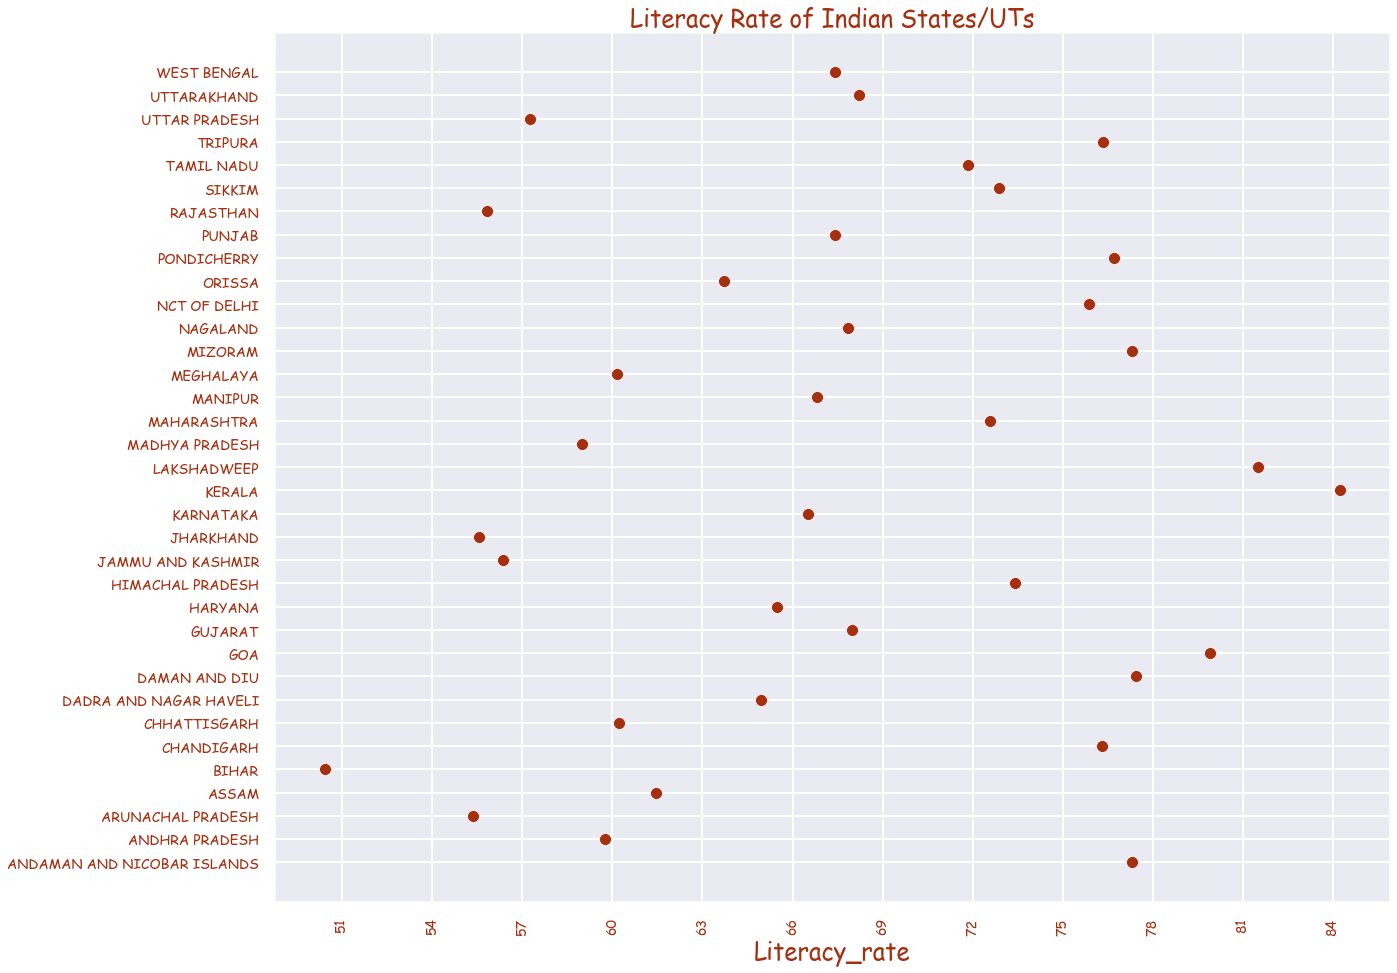

In [105]:
ax = sns.scatterplot(x="Literacy_rate", y="State name", data=df_india_census_states,color="#A53010")
ax.set_title("Literacy Rate of Indian States/UTs")
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(ylabel="")
plt.yticks(rotation='horizontal',fontsize=14)
plt.xticks(rotation='vertical',fontsize=14)

## How does the literacy rate of Indian states fare with respect to National Average?


In [106]:
national_literacy_rate=round((df_india_census_states["Literate"].sum()/df_india_census_states["Population"].sum())*100,2)

In [107]:
national_literacy_rate

63.07

In [108]:
std_literacy= df_india_census_states["Literacy_rate"].std()
std_low_literacy= national_literacy_rate - std_literacy
std_high_literacy= national_literacy_rate + std_literacy


## explain this graph

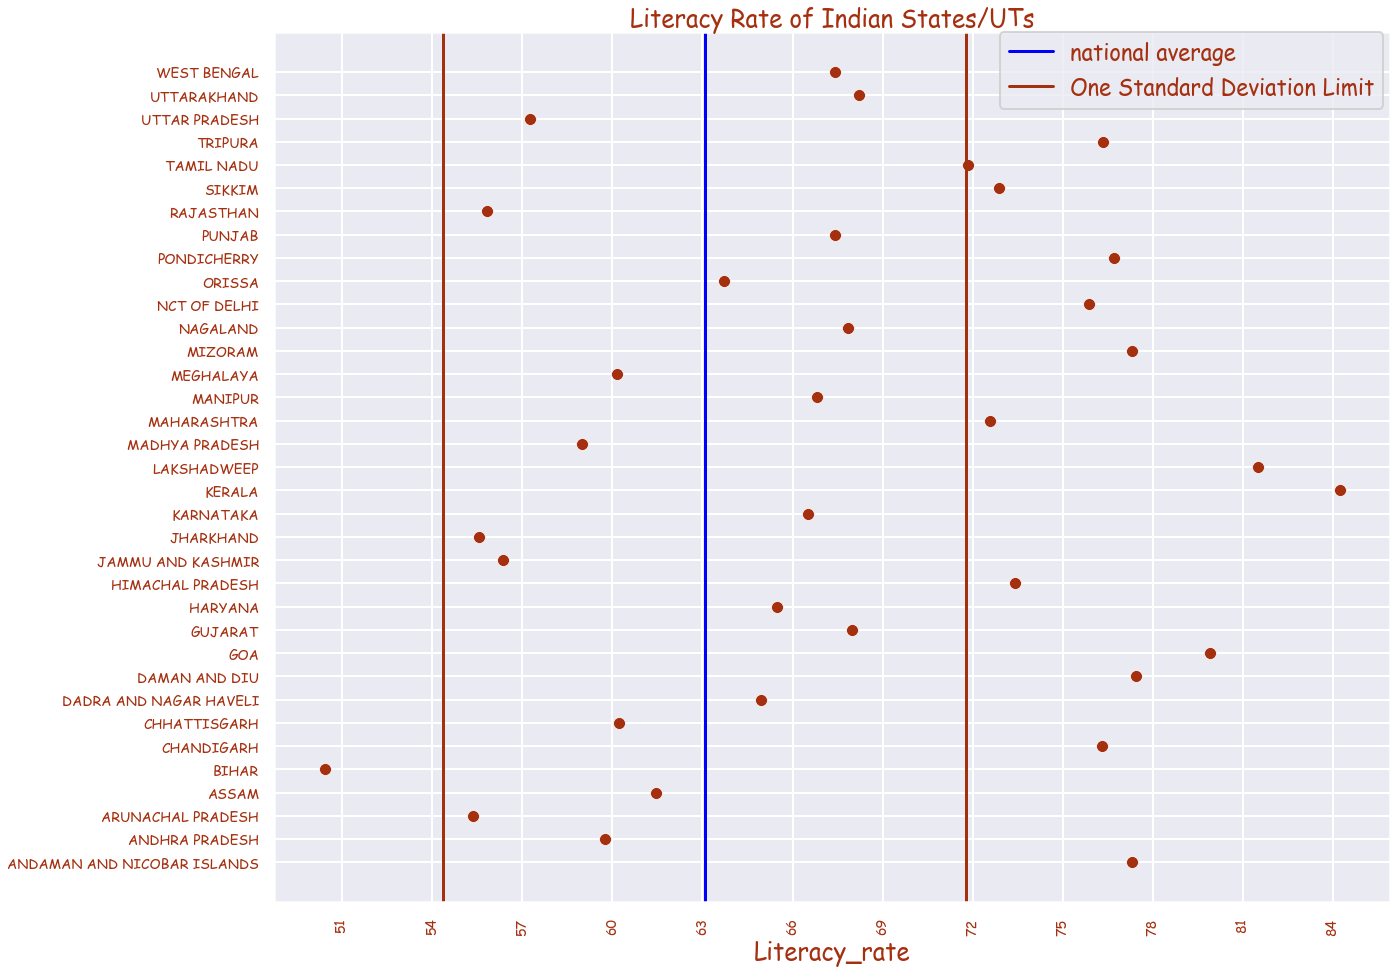

In [109]:
ax = sns.scatterplot(x="Literacy_rate", y="State name", data=df_india_census_states,color="#A53010")
ax.set_title("Literacy Rate of Indian States/UTs")
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(ylabel="")
ax.axvline(x=national_literacy_rate,color="blue",label="national average")
ax.axvline(x=std_low_literacy,color="#A53010",label="One Standard Deviation Limit")
ax.axvline(x=std_high_literacy,color="#A53010")
ax.legend(bbox_to_anchor=(0.65, 1), loc=2, borderaxespad=0.0)
plt.yticks(rotation='horizontal',fontsize=14)
plt.xticks(rotation='vertical',fontsize=14)
plt.savefig("Lit_rate.png",dpi=300)

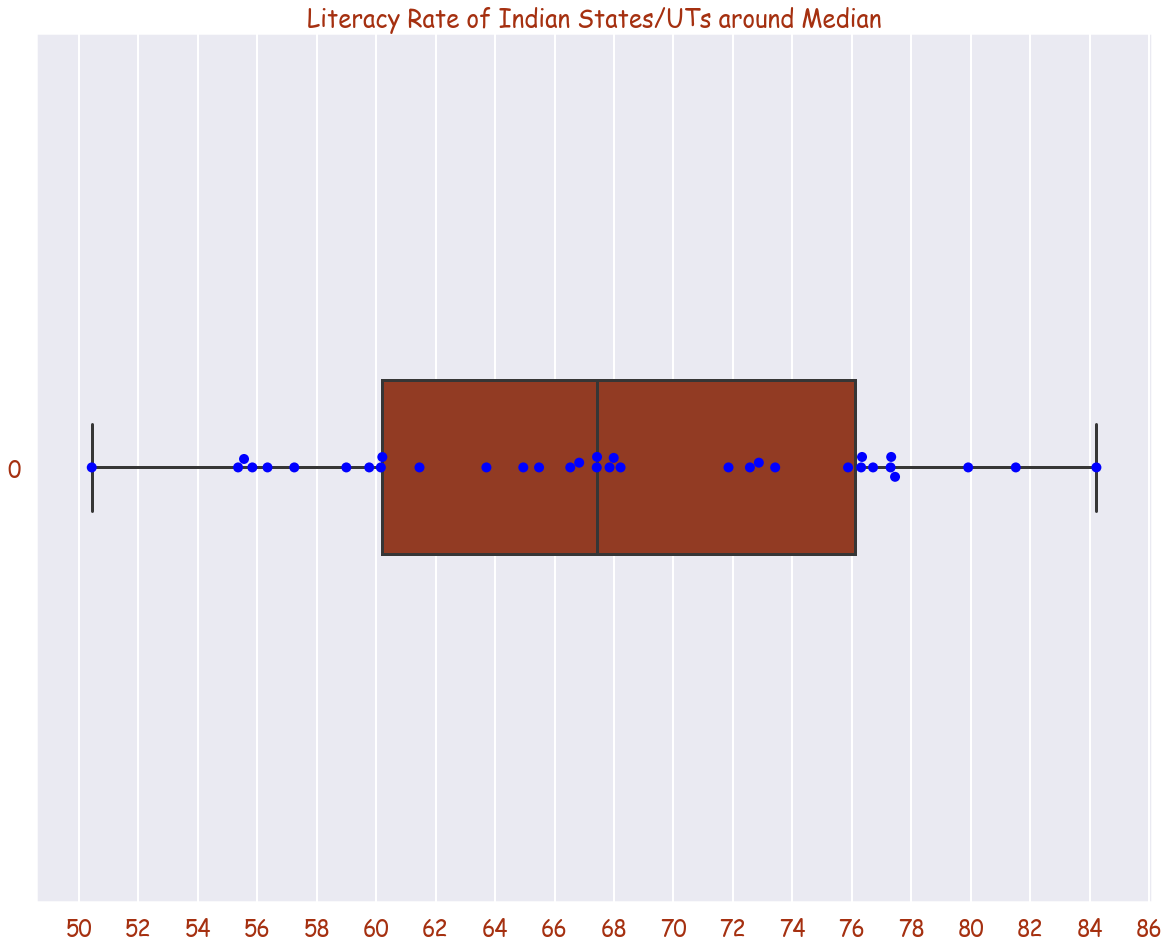

In [110]:
## Box plot

ax=sns.boxplot(data=df_india_census_states["Literacy_rate"], orient="h",color="#A53010",dodge=True,width=0.2)
ax=sns.swarmplot(data=df_india_census_states["Literacy_rate"], orient="h",color="blue",size=10)
ax.set_title("Literacy Rate of Indian States/UTs around Median")
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.savefig("Lit_rate_med.png",dpi=300)

## Literacy rate Vs Population of state

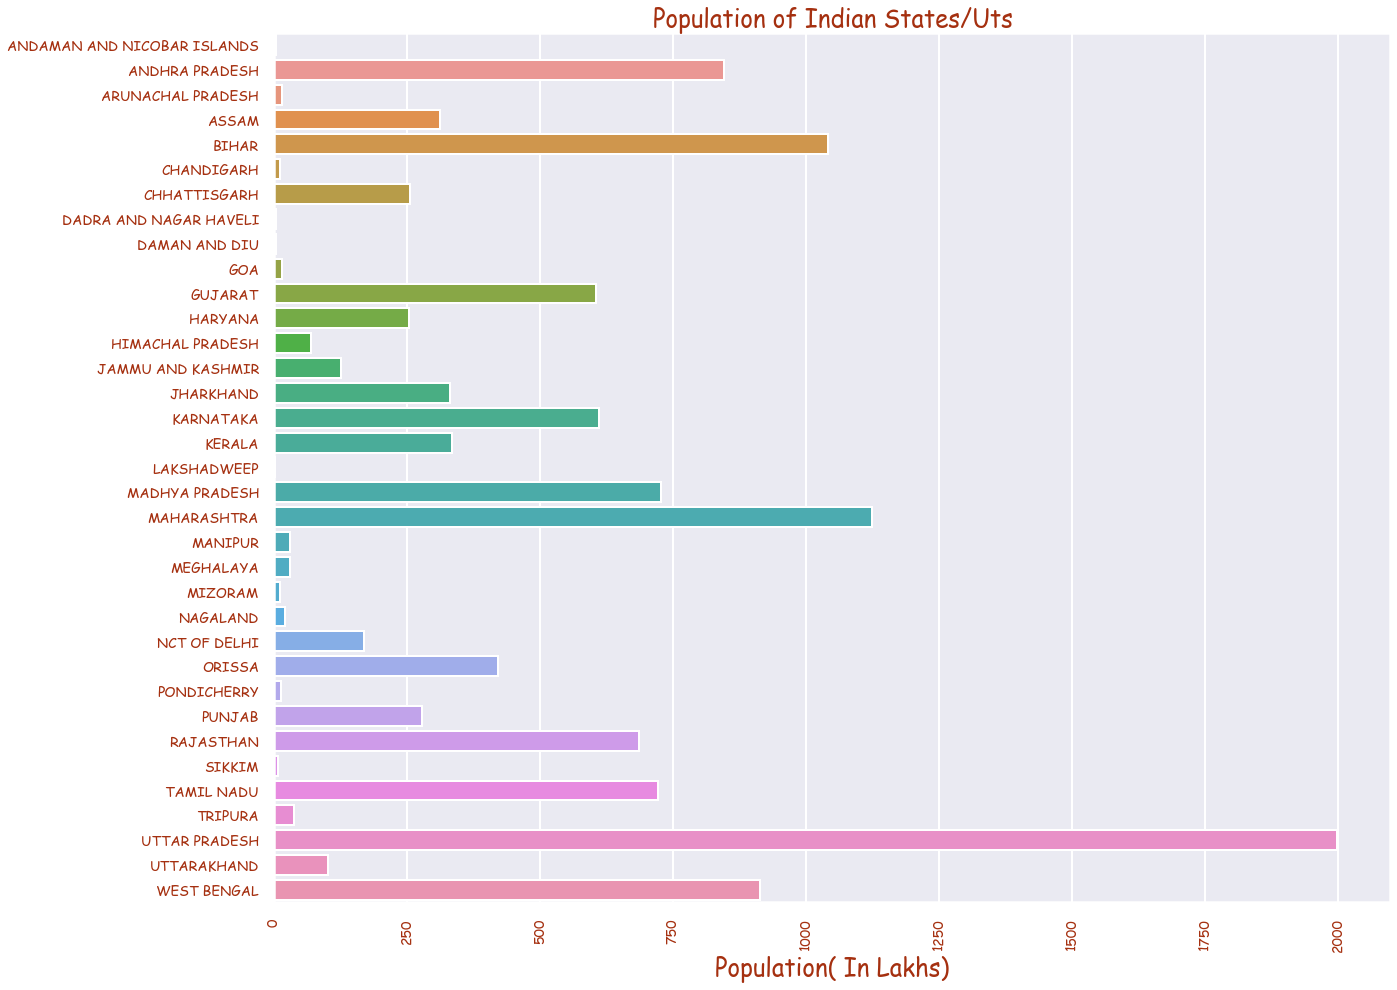

In [111]:
ax=sns.barplot(x = df_india_census_states['Population']/100000, y='State name',data=df_india_census_states)
ax.set_title("Population of Indian States/Uts")
ax.set(xlabel="Population( In Lakhs)")
ax.set(ylabel="")
plt.yticks(rotation='horizontal',fontsize=14)
plt.xticks(rotation='vertical',fontsize=14)
plt.savefig("population.png",dpi=300)

Lets check the literacy rate of top 5 most poupulous state

In [112]:
df_top5_pop=df_india_census_states.loc[df_india_census_states.Population.nlargest(5).index,:]

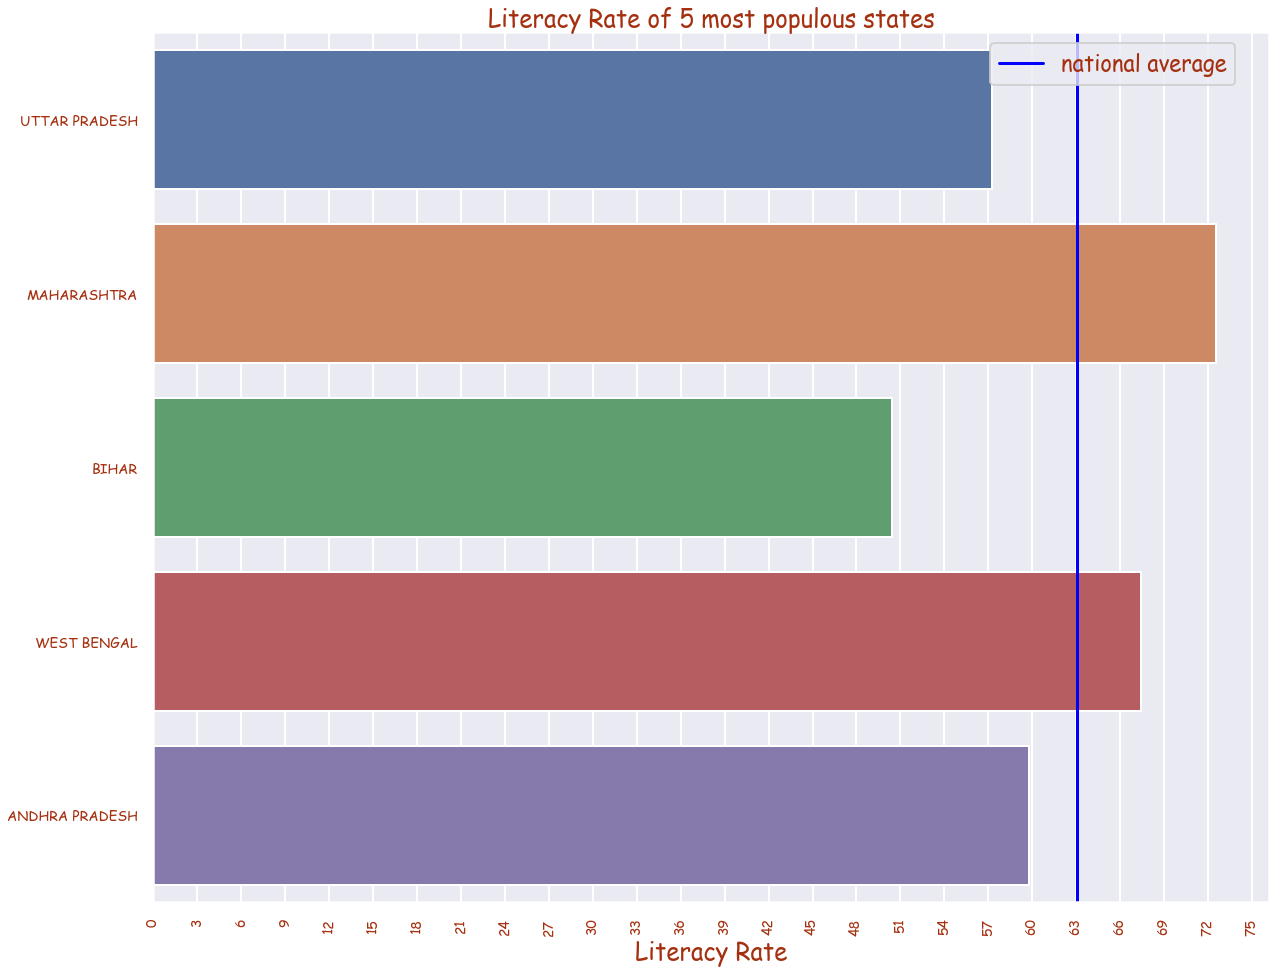

In [113]:
ax=sns.barplot(x = df_india_census_states["Literacy_rate"], y='State name',data=df_top5_pop)
ax.set_title("Literacy Rate of 5 most populous states")
ax.set(xlabel="Literacy Rate")
ax.set(ylabel="")
ax.axvline(x=national_literacy_rate,color="blue",label="national average")
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.legend(bbox_to_anchor=(0.74, 1),loc=2)
plt.yticks(rotation='horizontal',fontsize=14)
plt.xticks(rotation='vertical',fontsize=14)
plt.savefig("pop_top.png",dpi=300)

## 2. How is sex ratio distributed across Indian States?

In [114]:
df_india_census_states["sex_ratio"]=round((df_india_census_states["Female"]/df_india_census_states["Male"])*1000)

In [115]:
df_india_census_states

,State name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Agricultural_Workers,Literacy_rate,Male_Literacy_rate,Female_Literacy_rate,sex_ratio
0,ANDAMAN AND NICOBAR ISLANDS,380581,202871,177710,294281,164377,129904,4781,77.32,81.03,73.10,876.0
1,ANDHRA PRADESH,84580777,42442146,42138631,50556760,28251243,22305517,16967754,59.77,66.56,52.93,993.0
2,ARUNACHAL PRADESH,1383727,713912,669815,766005,439868,326137,36171,55.36,61.61,48.69,938.0
3,ASSAM,31205576,15939443,15266133,19177977,10568639,8609338,1845346,61.46,66.30,56.40,958.0
4,BIHAR,104099452,54278157,49821295,52504553,31608023,20896530,18345649,50.44,58.23,41.94,918.0
5,CHANDIGARH,1055450,580663,474787,805438,465346,340092,1687,76.31,80.14,71.63,818.0
6,CHHATTISGARH,25545198,12832895,12712303,15379922,8807893,6572029,5091882,60.21,68.64,51.70,991.0
7,DADRA AND NAGAR HAVELI,343709,193760,149949,223230,142521,80709,17799,64.95,73.56,53.82,774.0
8,DAMAN AND DIU,243247,150301,92946,188406,124643,63763,772,77.45,82.93,68.60,618.0
9,GOA,1458545,739140,719405,1165487,615823,549664,26760,79.91,83.32,76.41,973.0


In [116]:
national_sex_ratio= round((df_india_census_states["Female"].sum()/df_india_census_states["Male"].sum())*1000)
print(national_sex_ratio)
std_sex_ratio= df_india_census_states["sex_ratio"].std()
std_sex_ratio_low= national_sex_ratio-std_sex_ratio
std_sex_ratio_high= national_sex_ratio+std_sex_ratio

943.0


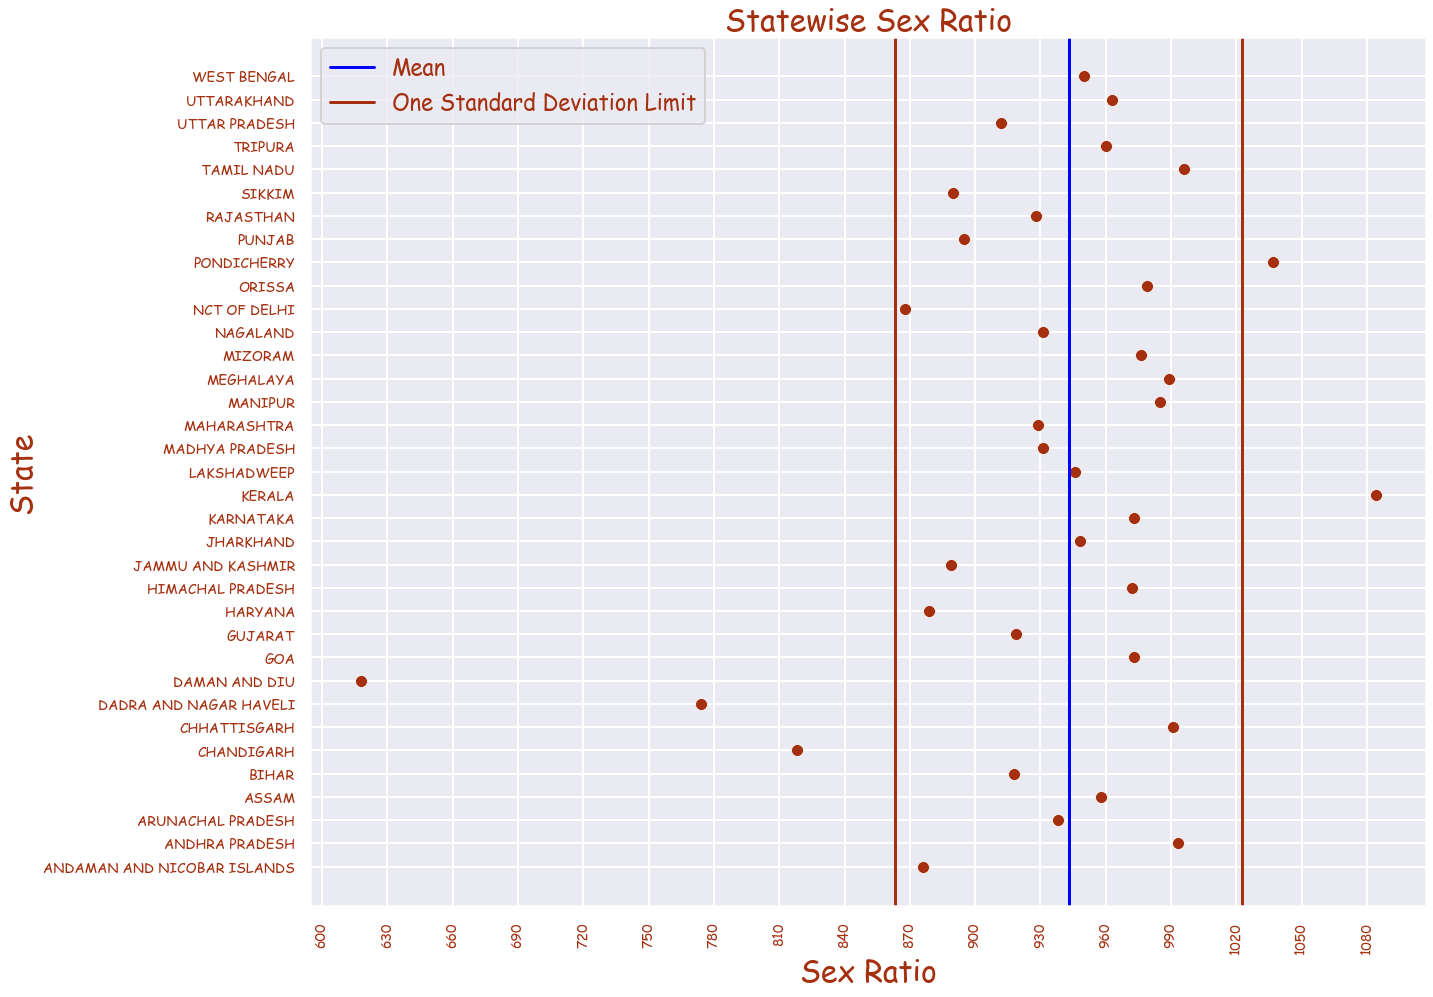

In [117]:
ax=sns.scatterplot(x="sex_ratio",y="State name",data=df_india_census_states,color="#A53010")
plt.xlabel('Sex Ratio',color="#A53010",fontsize=30)
plt.ylabel('State',color="#A53010",fontsize=30)
plt.title('Statewise Sex Ratio',color="#A53010",fontsize=30)
plt.yticks(rotation='horizontal',fontsize=14)
plt.xticks(rotation='vertical',fontsize=14)
plt.axvline(x=national_sex_ratio,color="blue", label="Mean")
plt.axvline(x=std_sex_ratio_low,color="#A53010",label="One Standard Deviation Limit")
plt.axvline(x=std_sex_ratio_high,color="#A53010")
plt.legend()
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
plt.savefig("sex_ratio.png",dpi=300)

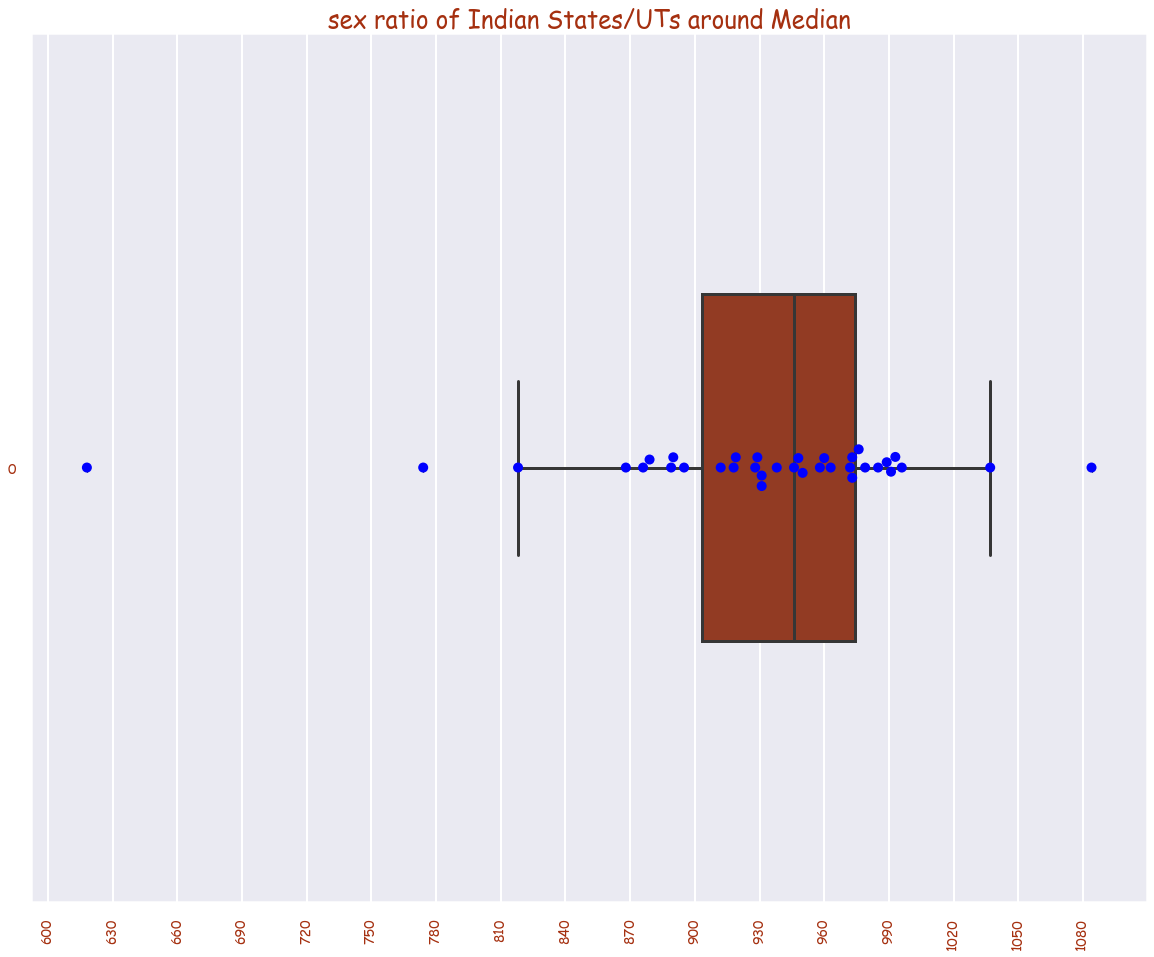

In [118]:
## Box plot

ax=sns.boxplot(data=df_india_census_states["sex_ratio"], orient="h",color="#A53010",dodge=True,width=0.4)
ax=sns.swarmplot(data=df_india_census_states["sex_ratio"], orient="h",color="blue",size=10)
ax.set_title("sex ratio of Indian States/UTs around Median")
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
plt.yticks(rotation='horizontal',fontsize=14)
plt.xticks(rotation='vertical',fontsize=14)
plt.savefig("sex_ratio_med.png",dpi=300)


## 3. How is Agricultural worker population distributed across Indian States?